In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:95% !important;}
div.cell.code_cell.rendered{width:95%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:14pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:14pt;padding:5px;}
table.dataframe{font-size:14px;}
</style>
"""))

# 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 봄

In [88]:
import numpy as np
import pandas as pd   # 파일 읽어오기위해
from tensorflow.keras.datasets import mnist       # mnist훈련셋과 테스트셋(load_data)
from tensorflow.keras.utils import to_categorical # 원핫인코딩  ---- 전처리를 위한
from tensorflow.keras.models import Sequential, save_model, load_model  # 모델관련
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from matplotlib import pyplot as plt   # 학습과정 시각화
# scale조정, train_test_split 등을 추가(여기서는 mnist가 알아서 던져준다)

In [89]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [90]:
print('타겟 :',data[1,0])
# print('이미지(784pixel=28*28) :', data[1,1:].reshape(28,28))
image = data[1,1:].reshape(28,28)
image.shape

타겟 : 0.0


(28, 28)

In [91]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

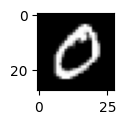

In [92]:
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

In [93]:
# 칼라사진 -> 흑백모드로 넘파이 배열로 읽기
# 반드시 opencv-python==4.8.1.78로 설치해야 넘파이와 충돌이 나지 않는다, 가상환경에도 추가해야

In [94]:
%pip install opencv-python==4.8.1.78

Note: you may need to restart the kernel to use updated packages.


In [95]:
import cv2
# 사진이미지를 흑백포맷의 넘파이 배열로 읽어오기
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE)
image_gray.shape

(408, 612)

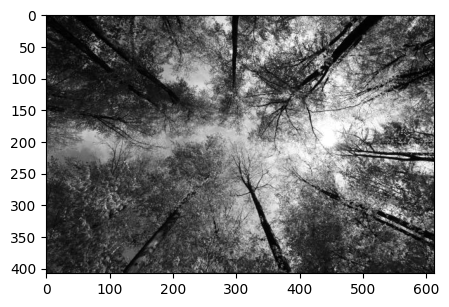

In [96]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [97]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # 이미지&답, 이미지&답의 6만개의 튜플로 리턴
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# ((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))
# 28x28의 이미지가 60000개, y_train을 원핫인코딩해서 분류분석할 것  -> DNN 방식으로 하면 97% 정도, 더 높이려면 CNN이미지딥러닝해야

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

2


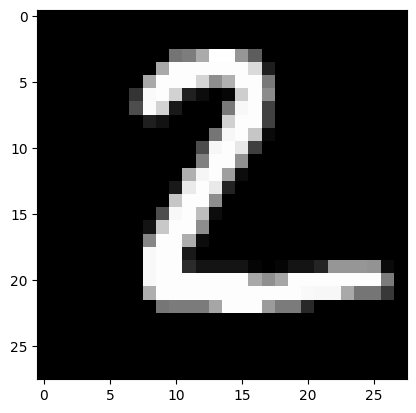

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0  

In [98]:
print(y_test[1])
plt.imshow(X_test[1], cmap='gray')
plt.show()
for row in X_test[1]:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

In [99]:
# Train데이터 6만개 => Train(5만개)+val(만개)로 분리, 한번만 실행!!
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [100]:
print('학습셋 : ', X_train.shape, y_train.shape)
print('검증셋 : ', X_val.shape,   y_val.shape)
print('시험셋 : ', X_test.shape,  y_test.shape)

학습셋 :  (50000, 28, 28) (50000,)
검증셋 :  (10000, 28, 28) (10000,)
시험셋 :  (10000, 28, 28) (10000,)


In [101]:
# 입력(독립) 변수 (n,28,28)  -> (n, 28*28)  ->  실수형변환  -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0  # 28*28을 -1로 입력하면 알아서 784로 해준다??
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [102]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0] 
train_Y = to_categorical(y_train, 10)  # 10은 카테고리 갯수(안쓰면 자동 입력. 가장큰수 만큼)
val_Y   = to_categorical(y_val, 10)
test_Y  = to_categorical(y_test, 10)
train_Y.shape,  val_Y.shape,   test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [103]:
# Train 5만->700개, Val 만->300개 (목적: 수업시간 중 fit시간 절약)  test데이터는 학습에 쓰이지 않으므로 제외
train_idx = np.random.choice(50000,700)  # 0~50000미만의 수 700개 뽑기(비복원 추출-중복된 수 없이)
val_idx   = np.random.choice(10000,300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]

In [104]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

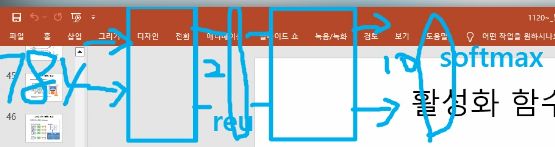

# 2. 모델 구성

In [105]:
model = Sequential()
model.add(Input(shape=(784,)))   # DNN은 1차원, 입력은 784개
model.add(Dense(units=2))        # activation='leakyrelu'-사용불가, 비율을 지정해줘야해서 바로 쓸 수 없다
# model.add(ReLU())           
model.add(LeakyReLU(alpha=0.01))  # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 2)                 1570      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 2)                 0         
                                                                 
 dense_36 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [106]:
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 하면 알아서 해준다
              optimizer='adam',
              metrics=['accuracy'])  # 평가지표


# 4. 모델 학습

In [107]:
%%time
hist = model.fit(train_X, train_Y,  # 학습셋
                 epochs=200,
                 batch_size=100,
                 validation_data=(val_X, val_Y),
                 verbose=0)

CPU times: total: 6.62 s
Wall time: 5.75 s


# 5. 모델 평가하기

In [108]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

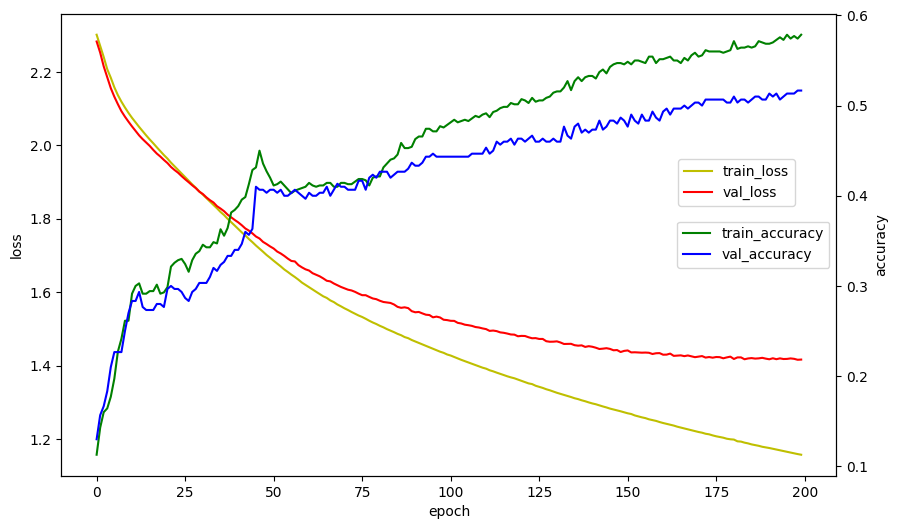

In [109]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'],'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'],'r', label='val_loss')
acc_ax = loss_ax.twinx()  # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [110]:
# 모델 평가(테스트셋)
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss : ', loss_metrics[0])
print('accuracy : ', loss_metrics[1])

loss :  1.4488565921783447
accuracy :  0.4771000146865845


# 👍 위 모델(DNN)의 accuracy 올리는 방법
- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)  - 레이어를 너무 많이 쌓으면 과적합이 일어난다.
- epoch 조정
- optimizer 변경(adam, Nadam, rmsprop, sgd,...)
- 과적합 방지(validation data 추가, 활성화 함수 relu계열, tanh, dropout)

In [111]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Train데이터 6만개 => Train(5만개)+val(만개)로 분리, 한번만 실행!!
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립) 변수 (n,28,28)  -> (n, 28*28)  ->  실수형변환  -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0  # 28*28을 -1로 입력하면 알아서 784로 해준다??
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0] 
train_Y = to_categorical(y_train, 10)  # 10은 카테고리 갯수(안쓰면 자동 입력. 가장큰수 만큼)
val_Y   = to_categorical(y_val, 10)
test_Y  = to_categorical(y_test, 10)
train_Y.shape,  val_Y.shape,   test_Y.shape

# # Train 5만->700개, Val 만->300개 (목적: 수업시간 중 fit시간 절약)  test데이터는 학습에 쓰이지 않으므로 제외
# train_idx = np.random.choice(50000,700)  # 0~50000미만의 수 700개 뽑기(비복원 추출-중복된 수 없이)
# val_idx   = np.random.choice(10000,300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]

model = Sequential()
model.add(Input(shape=(784,)))   # DNN은 1차원, 입력은 784개
model.add(Dense(units=2))        # activation='leakyrelu'-사용불가, 비율을 지정해줘야해서 바로 쓸 수 없다
# model.add(ReLU())           
model.add(LeakyReLU(alpha=0.01))  # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 하면 알아서 해준다
              optimizer='adam',
              metrics=['accuracy'])  # 평가지표

hist = model.fit(train_X, train_Y,  # 학습셋
                 epochs=200,
                 batch_size=100,
                 validation_data=(val_X, val_Y),
                 verbose=1)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 2)                 1570      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 2)                 0         
                                                                 
 dense_38 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
500/500 [==============================] - 1s 1ms/step - loss: 1.8044 - accuracy: 0.3765 - val_loss: 1.5631 - val_accuracy: 0.4492
Epoch 2/200
500/500 [==============================] - 1s 1ms/step - loss: 1.4699 - accuracy: 0.4562 - val_loss: 1.3600 - val_accuracy: 0.4851
Epoch 3/200
500/500 [========

Epoch 109/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9026 - accuracy: 0.6960 - val_loss: 0.8734 - val_accuracy: 0.7069
Epoch 110/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9028 - accuracy: 0.6957 - val_loss: 0.8753 - val_accuracy: 0.7055
Epoch 111/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9022 - accuracy: 0.6956 - val_loss: 0.8724 - val_accuracy: 0.7056
Epoch 112/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9024 - accuracy: 0.6949 - val_loss: 0.8749 - val_accuracy: 0.7065
Epoch 113/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9025 - accuracy: 0.6955 - val_loss: 0.8766 - val_accuracy: 0.7072
Epoch 114/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9020 - accuracy: 0.6956 - val_loss: 0.8729 - val_accuracy: 0.7099
Epoch 115/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9016 - accuracy: 0.6971 - val_loss: 0.8772 - val_ac

In [112]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 816us/step - loss: 0.9231 - accuracy: 0.6978


[0.9230904579162598, 0.6977999806404114]

####  모델조정

In [113]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Train데이터 6만개 => Train(5만개)+val(만개)로 분리, 한번만 실행!!
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립) 변수 (n,28,28)  -> (n, 28*28)  ->  실수형변환  -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0  # 28*28을 -1로 입력하면 알아서 784로 해준다??
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0] 
train_Y = to_categorical(y_train, 10)  # 10은 카테고리 갯수(안쓰면 자동 입력. 가장큰수 만큼)
val_Y   = to_categorical(y_val, 10)
test_Y  = to_categorical(y_test, 10)
train_Y.shape,  val_Y.shape,   test_Y.shape

# 모델
model = Sequential()
model.add(Input(shape=(784,)))   # DNN은 1차원, 입력은 784개
model.add(Dense(units=1024, activation='relu'))        # activation='leakyrelu'-사용불가, 비율을 지정해줘야해서 바로 쓸 수 없다
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128))
model.add(LeakyReLU(alpha=0.01))  # 음수결과에 대해 1%만 통과
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 하면 알아서 해준다
              optimizer='adam',
              metrics=['accuracy'])  # 평가지표

hist = model.fit(train_X, train_Y,  # 학습셋
                 epochs=20,
                 batch_size=100,
                 validation_data=(val_X, val_Y),
                 verbose=0)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_40 (Dense)            (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_5 (Dropout)         (None, 128)             

## 모델 평가하기¶

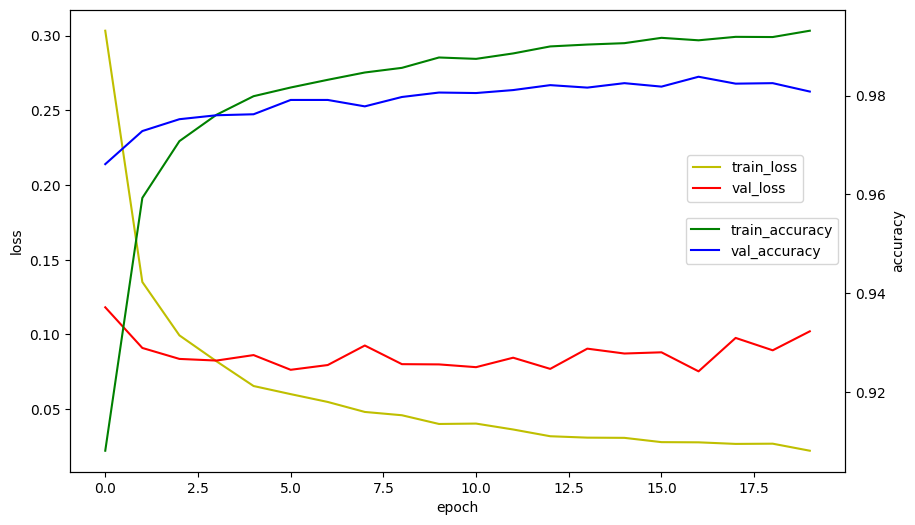

In [114]:
# 모델 평가
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'],'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'],'r', label='val_loss')
acc_ax = loss_ax.twinx()  # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [115]:
# 모델 평가
score = model.evaluate(test_X, test_Y)
score[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0856 - accuracy: 0.9834


0.9833999872207642

In [116]:
# 교차표
np.all(test_Y.argmax(axis=1) == y_test)   # 실제값(y_test)

True

In [117]:
# model.predict(test_X).argmax(axis=1)
y_hat = np.argmax(model.predict(test_X),axis=1)  # 예측값

313/313 [==============================] - 1s 3ms/step


In [118]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,971,0,1,0,0,0,4,1,3,0
1,0,1129,4,0,0,1,0,1,0,0
2,4,0,1018,0,1,0,2,5,2,0
3,1,0,5,980,0,4,0,5,11,4
4,0,0,2,0,963,1,4,2,0,10
5,3,0,0,6,1,868,9,0,3,2
6,2,3,0,0,2,1,950,0,0,0
7,0,3,7,0,1,0,0,1012,1,4
8,2,1,3,1,4,4,1,3,951,4


In [119]:
# 틀린 갯수
10000-10000*score[1]

166.0001277923584

# ※ 콜백함수 1 : 로그출력

In [120]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [121]:
%%time
# 매직명령어는 셀의 첫 머리에 단독으로 써야한다.

# 특정 epoch마다 로그출력되도록 제한
class CustomHistory(Callback):     # 1epoch 마다
    def __init__(self):  # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        '1 epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{:.4f}, ac:{:.4f}, val_loss:{:.4f}, val_acc:{:.4f}'\
                  .format(self.epoch, 
                          logs.get('loss'), 
                          logs.get('accuracy', '-'),
                          logs.get('val_loss', '-'), 
                          logs.get('val_accuracy', '-')
                 )
        )
customHistory = CustomHistory()        
        
# mnist data 가져오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Train데이터 6만개 => Train(5만개)+val(만개)로 분리, 한번만 실행!!
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립) 변수 (n,28,28)  -> (n, 28*28)  ->  실수형변환  -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0  # 28*28을 -1로 입력하면 알아서 784로 해준다??
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0] 
train_Y = to_categorical(y_train, 10)  # 10은 카테고리 갯수(안쓰면 자동 입력. 가장큰수 만큼)
val_Y   = to_categorical(y_val, 10)
test_Y  = to_categorical(y_test, 10)
train_Y.shape,  val_Y.shape,   test_Y.shape

# Train 5만->700개, Val 만->300개 (목적: 수업시간 중 fit시간 절약)  test데이터는 학습에 쓰이지 않으므로 제외
# accuracy 보다 콜백함수 적용이 중요해서
train_idx = np.random.choice(50000,700)  # 0~50000미만의 수 700개 뽑기(비복원 추출-중복된 수 없이)
val_idx   = np.random.choice(10000,300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]

# 모델
model = Sequential()
model.add(Input(shape=(784,)))   # DNN은 1차원, 입력은 784개
model.add(Dense(units=2, activation='relu'))   
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 하면 알아서 해준다
              optimizer='adam',
              metrics=['accuracy'])  # 평가지표
hist = model.fit(train_X, train_Y,  # 학습셋
                 epochs=50,
                 batch_size=100,
                 validation_data=(val_X, val_Y),
                 verbose=0,
                 callbacks=[customHistory])  # 콜백함수

epoch:10, loss:2.0812, ac:0.1900, val_loss:2.0476, val_acc:0.2167
epoch:20, loss:1.9473, ac:0.2557, val_loss:1.9322, val_acc:0.2833
epoch:30, loss:1.8518, ac:0.3557, val_loss:1.8578, val_acc:0.3333
epoch:40, loss:1.7722, ac:0.3757, val_loss:1.8043, val_acc:0.3100
epoch:50, loss:1.7005, ac:0.3743, val_loss:1.7589, val_acc:0.3300
CPU times: total: 2.36 s
Wall time: 2.01 s


# ※ 콜백함수 2 : EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy 값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [122]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))   # DNN은 1차원, 입력은 784개
model.add(Dense(units=2, activation='relu'))   
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 하면 알아서 해준다
              optimizer='adam',
              metrics=['accuracy'])  # 평가지표
# monitor기준으로 patience번 이상 안 좋은 데이터가 나오면 조기 종료
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3)   # 1epoch 마다 모니터링

hist = model.fit(train_X, train_Y,  # 학습셋
                 epochs=500,
                 batch_size=100,
                 validation_data=(val_X, val_Y),
                 verbose=1,
                 callbacks=[earlyStopping])  # 콜백함수

Epoch 1/500
7/7 [==============================] - 0s 20ms/step - loss: 2.3009 - accuracy: 0.1271 - val_loss: 2.2646 - val_accuracy: 0.1333
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 2.2740 - accuracy: 0.1086 - val_loss: 2.2517 - val_accuracy: 0.1300
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 2.2589 - accuracy: 0.1100 - val_loss: 2.2406 - val_accuracy: 0.1267
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 2.2462 - accuracy: 0.1129 - val_loss: 2.2316 - val_accuracy: 0.1333


# ※ 콜백함수 3 : ModelCheckpoint
- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백(나빠지기 직전값 저장)

In [123]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))   # DNN은 1차원, 입력은 784개
model.add(Dense(units=2, activation='relu'))   
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 하면 알아서 해준다
              optimizer='adam',
              metrics=['accuracy'])  # 평가지표

# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder):   # 폴더가 없으면 생성
    os.mkdir(model_save_folder)
    
# mnist-016-val0.4568.h5 형식으로 파일
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(
                filepath = file,
                monitor  = 'val_accuracy',   # 모니터할 지표(기본값 val_loss)                
                save_best_only = True,   # 모니터링 지표가 개선된 경우만 저장
                mode     = 'max',   # 값이 클수록 저장
                verbose  = 1
)

hist = model.fit(train_X, train_Y,  # 학습셋
                 epochs=20,
                 batch_size=100,
                 validation_data=(val_X, val_Y),
                 verbose=1,
                 callbacks=[checkpoint])  # 콜백함수

Epoch 1/20
1/7 [===>..........................] - ETA: 1s - loss: 2.3043 - accuracy: 0.0800
Epoch 1: val_accuracy improved from -inf to 0.12000, saving model to ./model08\mnist-001-val0.1200.h5
7/7 [==============================] - 0s 22ms/step - loss: 2.2949 - accuracy: 0.1600 - val_loss: 2.2926 - val_accuracy: 0.1200
Epoch 2/20
1/7 [===>..........................] - ETA: 0s - loss: 2.2830 - accuracy: 0.1800
Epoch 2: val_accuracy improved from 0.12000 to 0.12667, saving model to ./model08\mnist-002-val0.1267.h5
7/7 [==============================] - 0s 7ms/step - loss: 2.2732 - accuracy: 0.1857 - val_loss: 2.2780 - val_accuracy: 0.1267
Epoch 3/20
1/7 [===>..........................] - ETA: 0s - loss: 2.2553 - accuracy: 0.2100
Epoch 3: val_accuracy improved from 0.12667 to 0.13000, saving model to ./model08\mnist-003-val0.1300.h5
7/7 [==============================] - 0s 7ms/step - loss: 2.2542 - accuracy: 0.1843 - val_loss: 2.2637 - val_accuracy: 0.1300
Epoch 4/20
1/7 [===>..........